In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Función de Rosenbrock
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Derivada de la función de Rosenbrock
def rosenbrock_grad(x):
    dfdx0 = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
    dfdx1 = 200*(x[1] - x[0]**2)
    return np.array([dfdx0, dfdx1])


In [2]:
initial_points = [[-1.2, 1], [0, 0], [2, 2]]

# Parámetros para el descenso por gradiente (CG), método de Newton (Newton-CG) y BFGS
algorithms = ['CG', 'Newton-CG', 'BFGS']

results = {}
for algo in algorithms:
    results[algo] = []
    for point in initial_points:
        res = minimize(rosenbrock, point, method=algo, jac=rosenbrock_grad, options={'disp': True})
        results[algo].append(res)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 78
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 42
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 43
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 86
         Function evaluations: 106
         Gradient evaluations: 316
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 49
         Gradient evaluations: 112
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.

In [14]:
import pandas as pd

data = []
for algo in results:
    for idx, res in enumerate(results[algo]):
        data.append([algo, initial_points[idx], res.fun, res.nit, res.nfev])

df = pd.DataFrame(data, columns=["Algoritmo", "Punto Inicial", "Valor Mínimo", "Iteraciones", "Evaluaciones de la Función"])
df

,Algoritmo,Punto Inicial,Valor Mínimo,Iteraciones,Evaluaciones de la Función
0,CG,"[-1.2, 1]",1.880446e-14,36,78
1,CG,"[0, 0]",6.317906e-11,18,42
2,CG,"[2, 2]",5.979733e-11,17,43
3,Newton-CG,"[-1.2, 1]",2.001952e-11,86,106
4,Newton-CG,"[0, 0]",3.720250e-15,31,49
5,Newton-CG,"[2, 2]",1.813185e-15,28,44
6,BFGS,"[-1.2, 1]",2.535309e-15,32,39
7,BFGS,"[0, 0]",7.717288e-13,19,24
8,BFGS,"[2, 2]",3.271435e-14,30,35


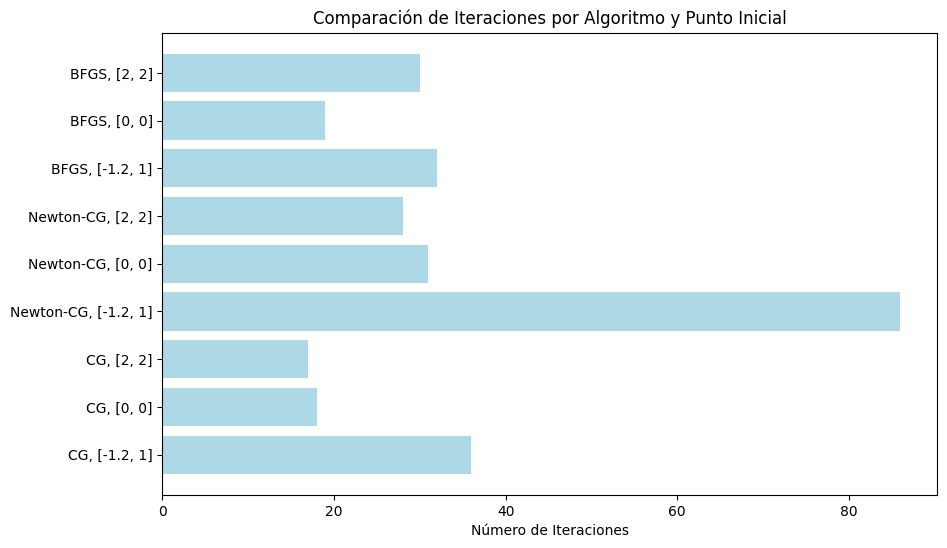

In [15]:
import matplotlib.pyplot as plt

# Crear gráficos de barras para comparar las iteraciones
algos = df["Algoritmo"]
points = df["Punto Inicial"]
iterations = df["Iteraciones"]

plt.figure(figsize=(10,6))
plt.barh([f"{algo}, {point}" for algo, point in zip(algos, points)], iterations, color='lightblue')
plt.xlabel("Número de Iteraciones")
plt.title("Comparación de Iteraciones por Algoritmo y Punto Inicial")
plt.show()